In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('house_data - house_data.csv.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

### add a new feature the 'age of the house'

In [6]:
df['house_age'] = 2022 - df.yr_built

### Add a new feature 'age of renovation'

In [35]:
df.renovation_age = np.where(df.yr_renovated > 0, 2022-df.yr_renovated, 0)

### Add a new feature - if renovted=1, if not = 0

In [42]:
df.renovated = np.where(df.yr_renovated==0, 0, 1)

### Converting the date to pandas standard date formart

In [44]:
df.date = pd.to_datetime(df.date)

In [46]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,67,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,71,31


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

In [52]:
(df.date.dt.year).min()

2014

In [140]:
df.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67,0
2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71,31
2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89,0


In [55]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
house_age         0
renovation_age    0
dtype: int64

### Checking and removing the outliers

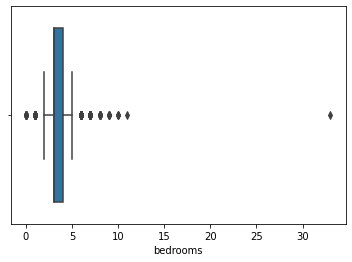

In [139]:
sns.boxplot('bedrooms', data=df)

In [59]:
df.set_index('date', inplace=True)

In [62]:
df = df.iloc[:, 1:]

In [ ]:
df['bedrooms'] = 

In [63]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864,1.106834
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411,6.157679
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000,88.000000


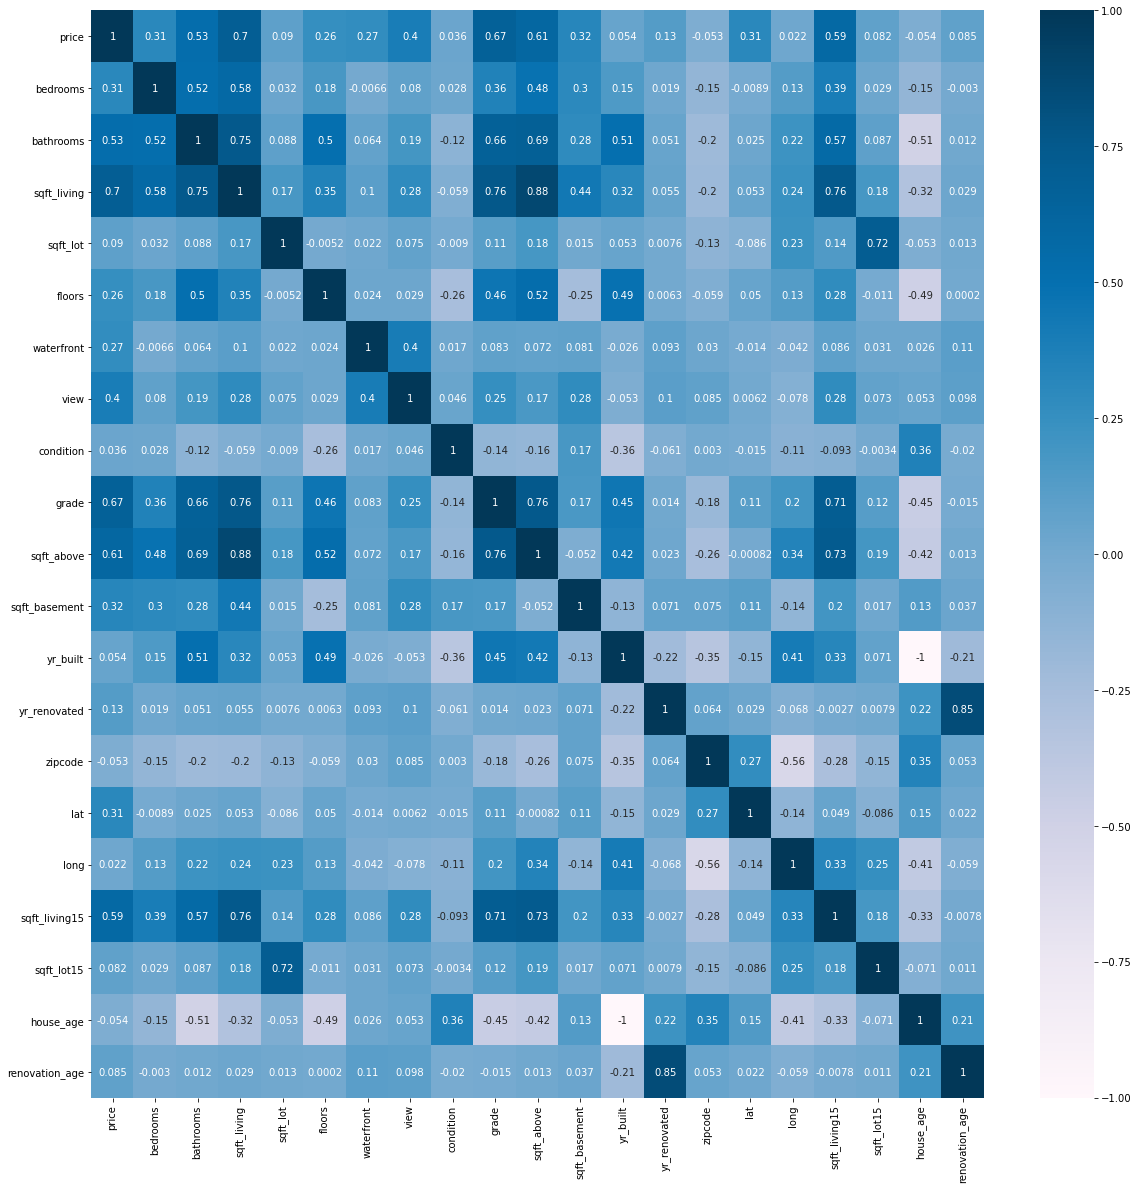

In [75]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(), cmap='PuBu', annot=True)


In [80]:
df['condition']

date
2014-10-13    3
2014-12-09    3
2015-02-25    3
2014-12-09    5
2015-02-18    3
             ..
2014-05-21    3
2015-02-23    3
2014-06-23    3
2015-01-16    3
2014-10-15    3
Name: condition, Length: 21613, dtype: int64

### Dividing the data into x and y variable

In [90]:
df.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67,0
2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71,31


In [92]:
y = df.price
x = df.drop('price', inplace=True, axis=0)

In [93]:
x.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67,0
2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71,31


In [141]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor,
                              ExtraTreesRegressor, GradientBoostingRegressor, 
                              RandomForestRegressor)

from sklearn.metrics import r2_score, f1_score, plot_confusion_matrix

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3,)

In [103]:
def train(model, x, y):
    score = cross_val_score(model, x, y, cv=10)
    mean_score = np.mean(score)
    
    return mean_score

In [132]:
models = [
    AdaBoostRegressor( n_estimators=50, learning_rate=1.0, loss='linear'),
    BaggingRegressor(n_estimators=50, max_samples=1.0, max_features=1.0),
    ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None,
                        min_samples_split=2, min_samples_leaf=1),
    GradientBoostingRegressor(loss='ls', learning_rate=1.5, n_estimators=1000),
    RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=10,
                          min_samples_split=2, min_samples_leaf=1)
]

### Training the data with each algorithm.

In [133]:
prediction = []
for model in range(len(models)):
    print(models[model])
    trainer = train(models[model], x_train, y_train)
    print(trainer)
    prediction.append(trainer)
    
#     print(models[model])
# trainer1 = train()

AdaBoostRegressor()
0.21855009823069485
BaggingRegressor(n_estimators=50)
0.8671334795976573
ExtraTreesRegressor()
0.8669410601870299
GradientBoostingRegressor(learning_rate=1.5, n_estimators=1000)
0.5769204981703151
RandomForestRegressor(max_depth=10, n_estimators=500)
0.8589799776950932


### Accessing all the result of the trained model

In [134]:
print(prediction)

# getting the maximum trainer
index_max_prediction = np.argmax(prediction)
max_prediction = prediction[index_max_prediction]
best_algo = models[index_max_prediction] #best performed algorithm
print(max_prediction)
print(best_algo)

[0.21855009823069485, 0.8671334795976573, 0.8669410601870299, 0.5769204981703151, 0.8589799776950932]
0.8671334795976573
BaggingRegressor(n_estimators=50)


### Fitting the data and predicting the unseen data and # Accuracy using r2_score

In [145]:
accuracy = []
predicted = []
for model in range(len(models)):
    models[model].fit(x_train, y_train)
    predict = models[model].predict(x_test)
    acc = r2_score(y_test, predict) # Accuracy using r2_score
    predicted.append(predict)
    accuracy.append(acc)
    
accuracy

[0.36905186082446406,
 0.8829386989955168,
 0.8899436072480515,
 0.6028993138923329,
 0.8758037018199828]

### Getting the maximum accuracy and its model

In [146]:
ind_max_accuracy = np.argmax(accuracy)
max_acccuracy = accuracy[ind_max_accuracy]
max_model_accuracy = models[ind_max_accuracy]

print(max_model_accuracy, ':', max_acccuracy)

ExtraTreesRegressor() : 0.8899436072480515


In [148]:
predicted[ind_max_accuracy]

array([322443.81, 335880.  , 256383.55, ..., 319807.96, 247401.1 ,
       578142.5 ])

In [149]:
y_test

date
2014-08-13    322000.0
2014-07-01    321000.0
2014-05-12    211000.0
2014-09-08    210000.0
2015-04-10    352500.0
                ...   
2014-12-08    550000.0
2014-05-19    446000.0
2015-05-01    310000.0
2014-07-28    250000.0
2015-05-04    606500.0
Name: price, Length: 6484, dtype: float64